# ML - Simple Regression Model.
- Prepared by - Sagun Shakya.
    - MSc. Data Science.
    - GITAM Institute of Science, Visakhapatnam.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
os.chdir(r'D:\Sagun Shakya\Python\Data Sets')
df = pd.read_csv('weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.shape

(10000, 3)

In [5]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [6]:
df.corr()

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


<Figure size 720x576 with 0 Axes>

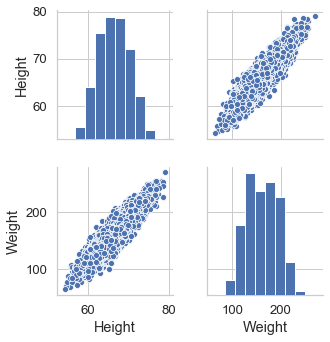

In [7]:
plt.figure( figsize = (10,8) )
sns.set(style = 'whitegrid', font_scale = 1.2)

sns.pairplot(df)
plt.show()

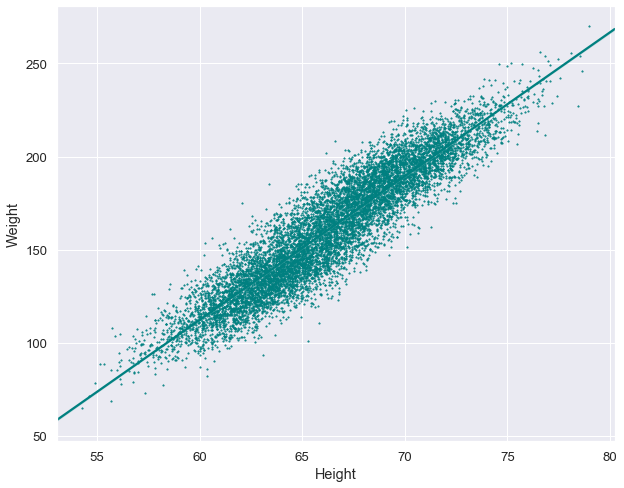

In [8]:
plt.figure( figsize = (10,8) )
sns.set(style = 'darkgrid', font_scale = 1.2)

sns.regplot(x = df.Height, y = df.Weight, marker = '*', color = '#008080', scatter_kws={'s':2})
plt.show()

# Fitting a Linear Model.

In [9]:
model = LinearRegression()

### Test train split.
- *arrays: sequence of indexables with same length / shape[0]

    - Allowed inputs are lists, numpy arrays, scipy-sparse matrices or pandas dataframes.
- test_size: float, int or None, optional (default=None)

    - If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split. If int, represents the absolute number of test samples. If None, the value is set to the complement of the train size. If train_size is also None, it will be set to 0.25.
- train_size: float, int, or None, (default=None)

    - If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the train split. If int, represents the absolute number of train samples. If None, the value is automatically set to the complement of the test size.
- random_state: int, RandomState instance or None, optional (default=None)

    - If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.


In [10]:
x_train, x_test, y_train, y_test = train_test_split(df.Height, df.Weight, test_size = 0.3, random_state = 42)

In [11]:
x_train_mod = np.array(x_train).reshape(-1,1)
x_test_mod = np.array(x_test).reshape(-1,1)
y_train_mod = np.array(y_train).reshape(-1,1)
y_test_mod = np.array(y_test).reshape(-1,1)

### Fitting a Linear Regression Model using 70% of the data (test_size = 0.3).

In [12]:
model.fit(x_train_mod, y_train_mod)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Predicting the test results using 30% of the data.

In [13]:
y_predicted = model.predict(x_test_mod)

In [14]:
y_predicted

array([[179.25411946],
       [180.34765156],
       [161.63849193],
       ...,
       [188.45953085],
       [129.84456058],
       [201.11830118]])

### Data visualization.

### 1. Training set results.

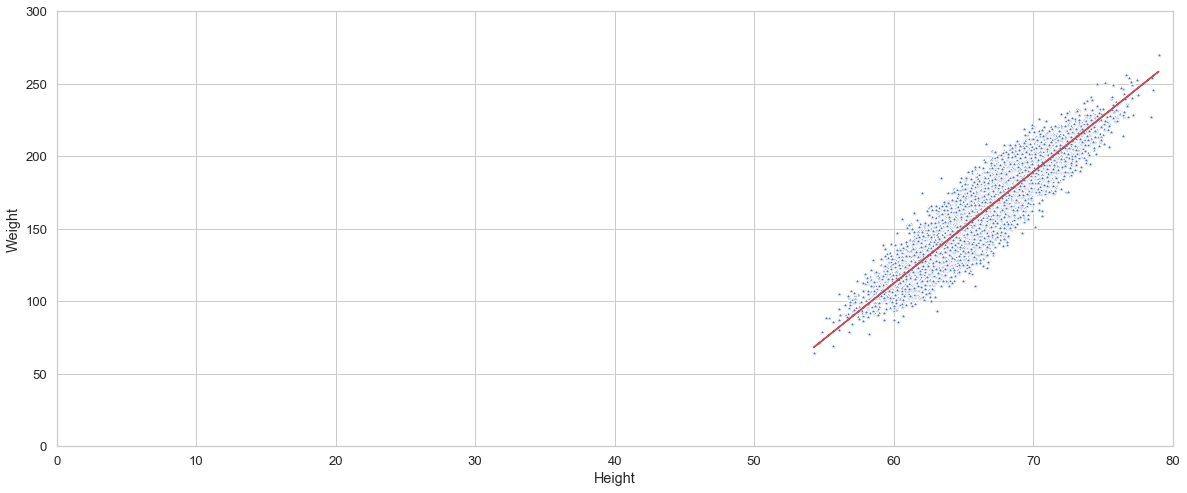

In [15]:
plt.figure( figsize = (20,8) )
sns.set(style = 'whitegrid', font_scale = 1.2)

sns.scatterplot(x=x_train, y = y_train, color = 'b', marker = '*')
plt.plot(x_train, model.predict(x_train_mod), color = 'r')
plt.xlim(0,80)
plt.ylim(0,300)
plt.show()

### 2. Test set results.

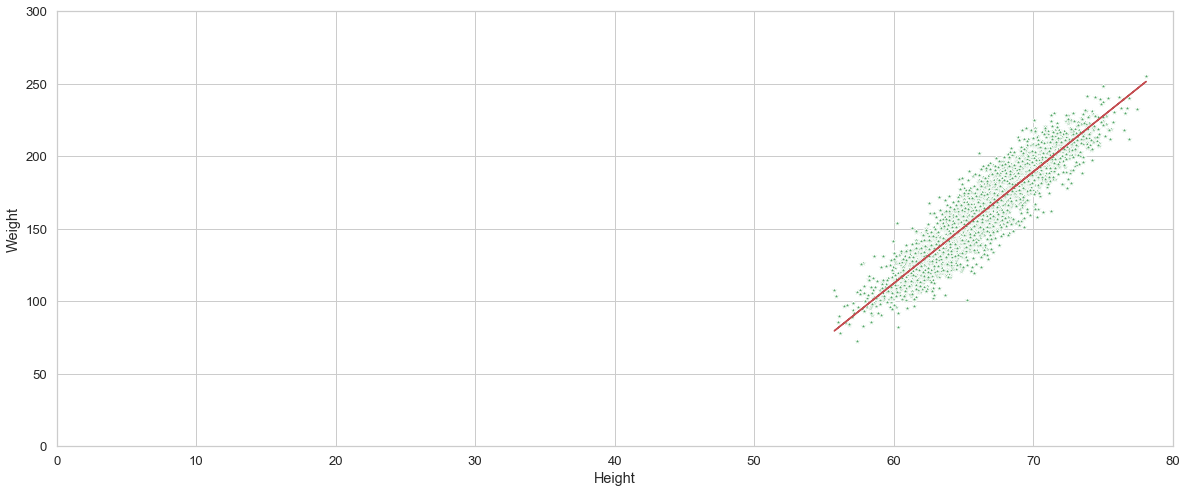

In [75]:
plt.figure( figsize = (20,8) )
sns.set(style = 'whitegrid', font_scale = 1.2)

sns.scatterplot(x=x_test, y = y_test, color = 'g', marker = '*')
plt.plot(x_test, model.predict(x_test_mod), color = 'r')
plt.xlim(0,80)
plt.ylim(0,300)
plt.show()

## To determine the slope and the intercept of the regression line.

In [17]:
print('Slope = ', model.coef_)
print('Intercept = ', model.intercept_)

Slope =  [[7.69542535]]
Intercept =  [-349.32334861]


## Prediction using a sample data point.

In [18]:
model.predict([[75.32]])

array([[230.29608901]])

 ## Using various regression metrics.

### 1. Mean Absolute Error:

<img src = "Mean Square Error.jpg"/>

In [20]:
from sklearn.metrics import mean_absolute_error as mae

In [21]:
mae(y_test, y_predicted)

9.709435604300088

### 2. Mean Squared Error:

<img src = "mse.jpg" />

In [23]:
from sklearn.metrics import mean_squared_error as mse

In [24]:
mse(y_test, y_predicted)

148.3622953279399

### 3. R² score, the coefficient of determination:
- It represents the proportion of variance (of y) that has been explained by the independent variables in the model.
- It provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model, through the proportion of explained variance.

    - Note that r2_score calculates unadjusted R² without correcting for bias in sample variance of y.

<img src = "r2_score.jpg"/>

In [26]:
from sklearn.metrics import r2_score as r2

In [27]:
r2(y_test, y_predicted)

0.8577298529881874

### 4. P - value:

In [28]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(x_train,y_train)

In [36]:
print('Slope = ', round(slope,2),
      '\nIntercept = ', round(intercept,2),
      '\nr_value = ', round(r_value,2),
      '\np - value = ', p_value,
      '\nStandard Error = ', round(std_err,2))

Slope =  7.7 
Intercept =  -349.32 
r_value =  0.92 
p - value =  0.0 
Standard Error =  0.04


#### Since the p - values is very less than $\alpha$ = 0.05, we reject the Null hypothesis that the gradient = 0.
- This means that there exists a significant linear relationship between height and weight. 

### 5. Residual analysis:
- We can plot the residuals versus each of the predicting variables to look for independence assumption. 
    - If the residuals are distributed uniformly randomly around the zero x-axes and do not form specific clusters, then the assumption holds true.
    
- When we plot the fitted response values (as per the model) vs. the residuals, we clearly observe that the variance of the residuals increases with response variable magnitude. 
    - Therefore, the problem does not respect homoscedasticity and some kind of variable transformation may be needed to improve model quality.

In [51]:
error = y_test_mod - y_predicted

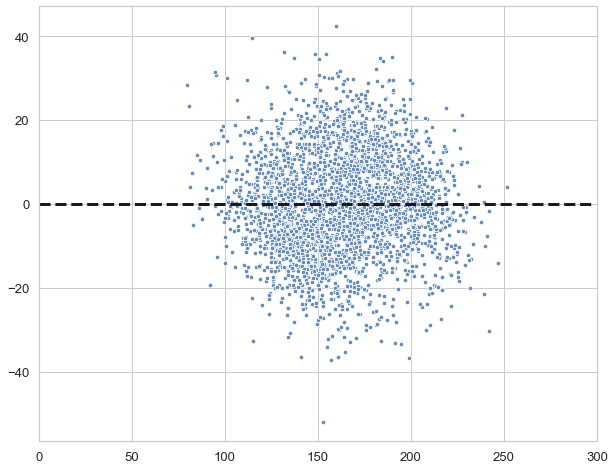

In [73]:
plt.figure( figsize = (10,8) )
sns.set(style = 'whitegrid', font_scale = 1.2)

sns.scatterplot(x = y_predicted.reshape(3000,), y = error.reshape(3000,), color = '#658cb7', s = 20)
plt.plot(np.arange(300), np.zeros(300), 'k--', linewidth = 3)
plt.xlim(0,300)
plt.show()

#### For more info:

<a href = "https://github.com/SSaishruthi/Linear_Regression_Detailed_Implementation/blob/master/Linear_Regression.ipynb"> github </a> 

# The End.